# The First Stars: Formation under Cosmic Ray Feedback -- Phase Diagrams

This notebook generates all simulation results figures for my current paper.  All simulations run on stampede.tacc.utexas.edu

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
mpl.rc('font', size=20.)
mpl.rc('font', family='serif')
mpl.rc('text', usetex=True)
import pyGadget
import my_plots

In [2]:
c = mcolors.ColorConverter().to_rgb
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)
flat = make_colormap([c('.75')])

In [3]:
sim = 'halo2'
simV = pyGadget.sim.Simulation('stampede/'+sim+'_vanilla',length='pc')
sim0 = pyGadget.sim.Simulation('stampede/'+sim+'_cr00',length='pc')
sim1 = pyGadget.sim.Simulation('stampede/'+sim+'_cr01',length='pc')
sim2 = pyGadget.sim.Simulation('stampede/'+sim+'_cr02',length='pc')
sim3 = pyGadget.sim.Simulation('stampede/'+sim+'_cr03',length='pc')
sim4 = pyGadget.sim.Simulation('stampede/'+sim+'_cr04',length='pc')
sim5 = pyGadget.sim.Simulation('stampede/'+sim+'_cr05',length='pc')

In [4]:
simname = {'vanilla':r'$u_{\rm \tiny CR} = 0$',
        'cr00': r'$u_{\rm \tiny CR} = u_0$', 
        'cr01': r'$u_{\rm \tiny CR} = 10 u_0$', 
        'cr02': r'$u_{\rm \tiny CR} = 10^2 u_0$', 
        'cr03': r'$u_{\rm \tiny CR} = 10^3 u_0$', 
        'cr04': r'$u_{\rm \tiny CR} = 10^4 u_0$',
        'cr05': r'$u_{\rm \tiny CR} = 10^5 u_0$'}
name = ['vanilla', 'cr00', 'cr01', 'cr02', 'cr03', 'cr04', 'cr05']

In [7]:
#nV, n0, n1, n2, n3, n4, n5, tag = 355, 331, 416, 255, 198, 209, 171, '_'+sim
nV, n0, n1, n2, n3, n4, n5, tag = 261, 262, 239, 238, 191, 223, 250, '_'+sim

In [8]:
snapV = simV.load_snapshot(nV, 'ndensity', 'temp', 'h2frac', 'HDfrac', 'electron_frac')#,'coordinates')#,stride=1e5)
snap0 = sim0.load_snapshot(n0, 'ndensity', 'temp')#, 'h2frac', 'HDfrac', 'electron_frac')#,'coordinates')#,stride=1e5)
snap1 = sim1.load_snapshot(n1, 'ndensity', 'temp')#, 'h2frac', 'HDfrac', 'electron_frac')#,'coordinates')#,stride=1e5)
snap2 = sim2.load_snapshot(n2, 'ndensity', 'temp')#, 'h2frac', 'HDfrac', 'electron_frac')#,'coordinates')#,stride=1e5)
snap3 = sim3.load_snapshot(n3, 'ndensity', 'temp')#, 'h2frac', 'HDfrac', 'electron_frac')#,'coordinates')#,stride=1e5)
snap4 = sim4.load_snapshot(n4, 'ndensity', 'temp')#, 'h2frac', 'HDfrac', 'electron_frac')#,'coordinates')#,stride=1e5)
snap5 = sim5.load_snapshot(n5, 'ndensity', 'temp')#, 'h2frac', 'HDfrac', 'electron_frac')#,'coordinates')#,stride=1e5)
snaplist = [snap0,snap1,snap2,snap3,snap4,snap5]
snapV.header.Redshift

Turning on gas particle refinement.
There are 10566936 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 10530288 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 10220192 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8774976 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 10613408 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 7325568 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 6152016 highest resolution particles.
Loading data...


21.70209360076398

## Density - Temperature phase diagram

21.7321784371
21.9363564265
22.8077127423
24.4555123033
26.139455084
26.7957550695


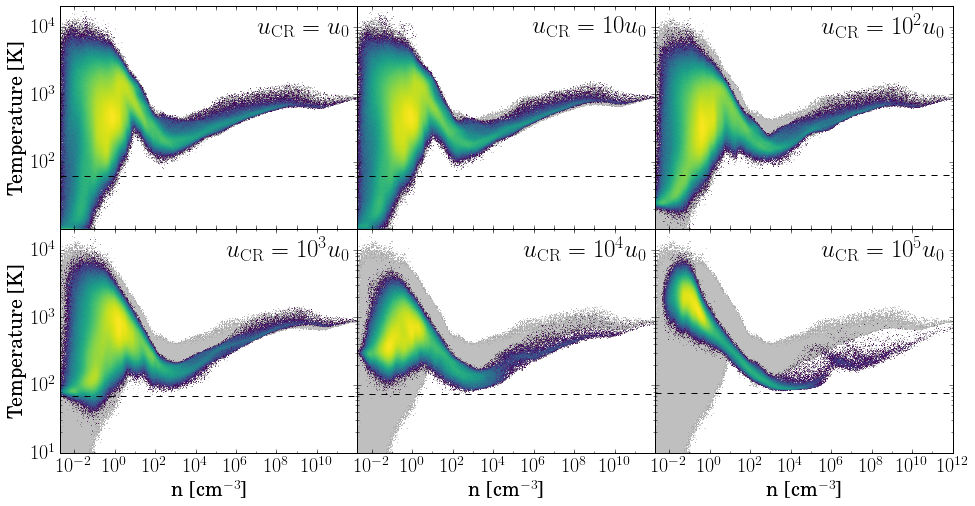

In [10]:
fig, axarr = plt.subplots(2,3, figsize=(16,8))

axes = axarr.flatten()
for i, (ax,snap) in enumerate(zip(axes,snaplist)):
    print snap.header.Redshift
    ax = my_plots.temp(snapV,ax, cmbline=False, cmap=flat)
    ax = my_plots.temp(snap,ax, cmap=plt.cm.viridis)
    ax.text(.97,.95, simname[name[i+1]], ha='right', va='top', size=25, transform=ax.transAxes)

for i in [0,1,2]:
    axes[i].xaxis.set_ticklabels([])
for i in [1,2,4,5]:
    axes[i].yaxis.label.set_visible(False)
    axes[i].yaxis.set_ticklabels([])
    
axes[3].set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10))
axes[4].set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10))
axes[5].set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10,1e12))
axes[0].set_yticks((1e2,1e3,1e4))
axes[3].set_yticks((10,1e2,1e3,1e4))

fig.subplots_adjust(hspace=0.0,wspace=0.0)
fig.savefig('figures/phase_diagrams/temp'+tag+'.pdf', bbox_inches='tight')

## H2 molecular fraction - density phase diagram

/home/jhummel/anaconda/envs/upgrading/lib/python2.7/site-packages/matplotlib/image.py:375: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


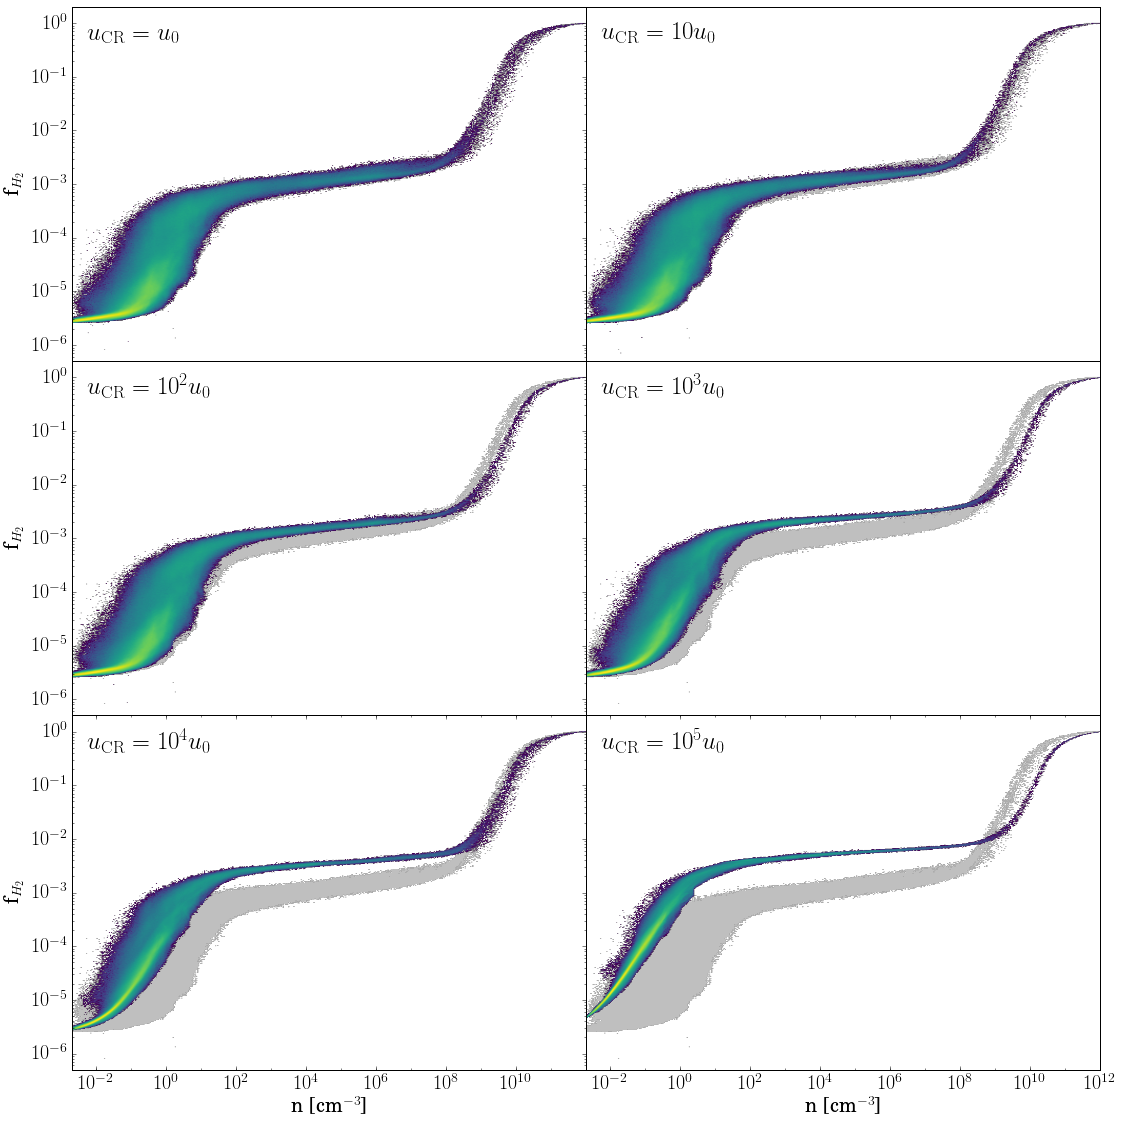

In [9]:
fig = plt.figure(1, figsize=(16,16))
ax0 = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)
ax5 = fig.add_subplot(326)

for i, (ax,snap) in enumerate([(ax0,snap0), (ax1,snap1), (ax2,snap2),
                               (ax3,snap3), (ax4,snap4), (ax5,snap5)]):
    ax = my_plots.h2frac(snapV,ax, cmbline=False, cmap=flat)
    ax = my_plots.h2frac(snap,ax, cmap=plt.cm.viridis)
    ax.text(.03,.95, simname[name[i+1]], ha='left', va='top', size=25, transform=ax.transAxes)

ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax3.xaxis.set_visible(False)

ax1.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax5.yaxis.set_visible(False)

ax4.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10))
ax5.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10,1e12))

plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/phase_diagrams/H2'+tag+'.png', bbox_inches='tight')

## HD molecular fraction - density phase diagram

In [ ]:
fig = plt.figure(1, figsize=(16,16))
ax0 = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)
ax5 = fig.add_subplot(326)

for i, (ax,snap) in enumerate([(ax0,snap0), (ax1,snap1), (ax2,snap2),
                               (ax3,snap3), (ax4,snap4), (ax5,snap5)]):
    ax = my_plots.HDfrac(snapV,ax, cmbline=False, cmap=flat)
    ax = my_plots.HDfrac(snap,ax, cmap=plt.cm.viridis)
    ax.text(.03,.95, simname[name[i+1]], ha='left', va='top', size=25, transform=ax.transAxes)

ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax3.xaxis.set_visible(False)

ax1.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax5.yaxis.set_visible(False)

ax4.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10))
ax5.set_xticks((1e-2,1e0,1e2,1e4,1e6,1e8,1e10,1e12))
ax2.set_yticks((1e-10,1e-9,1e-8,1e-7,1e-6,1e-5))
ax4.set_yticks((1e-10,1e-9,1e-8,1e-7,1e-6,1e-5))

plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/phase_diagrams/HD'+tag+'.png', bbox_inches='tight')

## Electron fraction - overlay

In [ ]:
fig = plt.figure(3, figsize=(12,9))
ax = fig.add_subplot(111)
ax = my_plots.electron_frac(snapV,ax, cmap=plt.cm.Reds_r)
ax = my_plots.electron_frac(snap0,ax, cmap=plt.cm.winter, alpha=.5)

fig.savefig('figures/phase_diagrams/elec-overlay'+tag+'.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(3, figsize=(12,9))
ax = fig.add_subplot(111)
ax = my_plots.temp(snapV, ax, cmap=plt.cm.Reds_r)
ax = my_plots.temp(snap0, ax, cmap=plt.cm.winter, alpha=.5)

fig.savefig('figures/phase_diagrams/temp-overlay'+tag+'.png', bbox_inches='tight')

## H2 fraction - overlay

In [ ]:
fig = plt.figure(3, figsize=(12,9))
ax = fig.add_subplot(111)
ax = my_plots.h2frac(snapV,ax, cmap=plt.cm.Reds_r)
ax = my_plots.h2frac(snap0,ax, cmap=plt.cm.winter, alpha=.5)
#ax = my_plots.h2frac(snap3,ax, cmap=plt.cm.Greens_r)
#ax = my_plots.h2frac(snap5,ax, cmap=plt.cm.Reds_r)

fig.savefig('figures/phase_diagrams/h2-overlay'+tag+'.png', bbox_inches='tight')

## HD fraction - overlay

In [ ]:
fig = plt.figure(3, figsize=(12,9))
ax = fig.add_subplot(111)
ax = my_plots.HDfrac(snapV,ax, cmap=plt.cm.Reds_r)
ax = my_plots.HDfrac(snap0,ax, cmap=plt.cm.winter, alpha=.5)
#ax = my_plots.HDfrac(snap3,ax, cmap=plt.cm.Greens_r)
#ax = my_plots.HDfrac(snap5,ax, cmap=plt.cm.Reds_r)

fig.savefig('figures/phase_diagrams/HD-overlay'+tag+'.png', bbox_inches='tight')

## Combination Overlay

## Halo Temperature vs Radius